# Analysis of moves list

Let's try to do something with our list of moves ...

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [275]:
data = pd.read_csv('./data_othello.csv')
display(data.head())
input_shape = data.shape
print("Input shape : {}".format(input_shape))

,Player 1,PLayer 2,Liste Moves,Score,UCB 1,UCB2,it 1,it 2,th 1,th 2,depth 1,depth 2
0,Random,Random,"[((3, 2), 1), ((2, 2), -1), ((2, 3), 1), ((2, ...",-12,0.14,0.14,20.0,20.0,10.0,10.0,3.0,3.0
1,Random,Random,"[((2, 3), 1), ((2, 2), -1), ((2, 1), 1), ((1, ...",10,0.14,0.14,20.0,20.0,10.0,10.0,3.0,3.0
2,Random,Random,"[((5, 4), 1), ((3, 5), -1), ((2, 5), 1), ((5, ...",0,0.14,0.14,20.0,20.0,10.0,10.0,3.0,3.0
3,Random,Random,"[((4, 5), 1), ((5, 3), -1), ((3, 2), 1), ((4, ...",-6,0.14,0.14,20.0,20.0,10.0,10.0,3.0,3.0
4,Random,Random,"[((5, 4), 1), ((3, 5), -1), ((2, 6), 1), ((5, ...",-4,0.14,0.14,20.0,20.0,10.0,10.0,3.0,3.0


Input shape : (11762, 12)


This time, the only thing that matter is the liste of moves and the win (for the label) so let go for some data transformation !

In [270]:
def split_lst_move(row) :

    row['Liste Moves'] = row['Liste Moves'].replace('[', '')
    row['Liste Moves'] = row['Liste Moves'].replace(']', '')
    row['Liste Moves'] = row['Liste Moves'].replace('((', '')
    l_row = row['Liste Moves'].split("), ")
    l_row[-1] = l_row[-1][:-1]
    # print(row['win'])
    # row = row.drop(['Liste Moves'], axis = 1)
    if len(l_row) == 120 : # Drop party that ended before filled the whole board (don't know how to do for the density map otherwise)
        for i in range(0,len(l_row)-1, 2):
            if (int(l_row[i + 1]) < 0 and int(row['Score']) < 0) or (int(l_row[i + 1]) > 0 and int(row['Score']) > 0) :
                n_row = l_row[i].split(", ")
                row[str(round(i/2) ) + 'x'] = n_row[0]
                row[str(round(i/2) ) + 'y'] = n_row[1]
                # row[str(round(i/2)) + 'p'] = l_row[i + 1]
    return row[1:]

# row1 = df.iloc[1]
# print(split_lst_move(row1))

In [276]:
df = data.drop(data.iloc[:, :2].columns, axis=1)
df = df.drop(df.iloc[:,2:].columns, axis=1)
# df = df[:500] # Work on a smaller part for try
df = df.apply(lambda row: split_lst_move(row), axis = 1)
df.head()
# pd.DataFrame(df['Liste Moves'].tolist(), index=df.index)
# df.head()

,0x,0y,10x,10y,11x,11y,12x,12y,13x,13y,...,5y,6x,6y,7x,7y,8x,8y,9x,9y,Score
0,NaN,NaN,NaN,NaN,4,2,NaN,NaN,0,2,...,1,NaN,NaN,2,6,NaN,NaN,0,6,-12
1,2,3,5,4,NaN,NaN,4,1,NaN,NaN,...,NaN,0,3,NaN,NaN,5,2,NaN,NaN,10
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,2,1,NaN,NaN,1,1,...,4,NaN,NaN,3,1,NaN,NaN,5,4,-6
4,NaN,NaN,NaN,NaN,3,1,NaN,NaN,2,3,...,5,NaN,NaN,6,3,NaN,NaN,2,4,-4


In [274]:
def generate_z(row, Z):
    row = row.dropna()
    for i in range(0, len(row) - 2, 2):
        Z[int(row[i])][int(row[i+1])] += 1

(10161, 121)

/tmp/ipykernel_2138019/1501196461.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig = plt.pcolormesh(X,Y,Z)


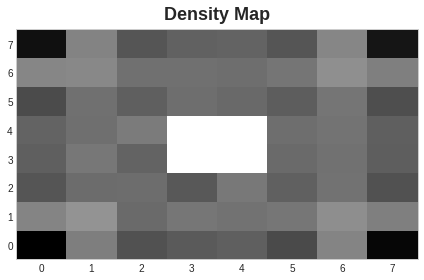

In [288]:
# Sample data
side = np.linspace(0,7,8)
X,Y = np.meshgrid(side,side)
Z = np.zeros((8,8))
df.apply(lambda row: generate_z(row, Z), axis = 1)

# # Plot the density map using nearest-neighbor interpolation
fig = plt.pcolormesh(X,Y,Z)
plt.title('Density Map')
plt.show()
fig = fig.get_figure()
fig.savefig('./images/Density_Map.png')

This density map was generated by keeping only the moves played by the winning player. Most of the dataset was generated using randomness and MCTS. MinMax and Alpha-Beta using a density map doesn't influence to much our result.

<img src="./images/Density_Map.png">


In [297]:
def split_lst_move2(row) :

    row['Liste Moves'] = row['Liste Moves'].replace('[', '')
    row['Liste Moves'] = row['Liste Moves'].replace(']', '')
    row['Liste Moves'] = row['Liste Moves'].replace('((', '')
    l_row = row['Liste Moves'].split("), ")
    l_row[-1] = l_row[-1][:-1]
    # print(row['win'])
    # row = row.drop(['Liste Moves'], axis = 1)
    if len(l_row) == 120 : # Drop party that ended before filled the whole board (don't know how to do for the density map otherwise)
        for i in range(0,len(l_row)-1, 2):
            row[str(l_row[i])] = int(i/2)
                # n_row = l_row[i].split(", ")
                # row[str(round(i/2) +1 ) + 'x'] = n_row[0]
                # row[str(round(i/2) +1 ) + 'y'] = n_row[1]
                # row[str(round(i/2)) + 'p'] = l_row[i + 1]
    return row[1:]

In [298]:
df2 = data.drop(data.iloc[:, :2].columns, axis=1)
df2 = df2.drop(df2.iloc[:,2:].columns, axis=1)
df2 = df2.apply(lambda row: split_lst_move2(row), axis = 1)
df2.head()

,"0, 0","0, 1","0, 2","0, 3","0, 4","0, 5","0, 6","0, 7","1, 0","1, 1",...,"6, 7","7, 0","7, 1","7, 2","7, 3","7, 4","7, 5","7, 6","7, 7",Score
0,25.0,27.0,13.0,44.0,55.0,39.0,9.0,23.0,59.0,6.0,...,58.0,47.0,40.0,37.0,34.0,53.0,42.0,54.0,46.0,-12
1,13.0,4.0,19.0,6.0,9.0,14.0,31.0,56.0,30.0,3.0,...,50.0,41.0,59.0,27.0,37.0,48.0,40.0,43.0,46.0,10
2,57.0,56.0,46.0,51.0,18.0,55.0,22.0,58.0,50.0,23.0,...,47.0,34.0,41.0,42.0,45.0,10.0,11.0,30.0,40.0,0
3,40.0,26.0,18.0,32.0,38.0,59.0,58.0,43.0,29.0,13.0,...,22.0,41.0,36.0,35.0,46.0,48.0,31.0,57.0,47.0,-6
4,52.0,41.0,22.0,17.0,32.0,47.0,39.0,40.0,53.0,51.0,...,33.0,55.0,27.0,23.0,8.0,31.0,48.0,58.0,56.0,-4


In [299]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

ModuleNotFoundError: No module named 'tensorflow'